<a href="https://colab.research.google.com/github/Himm11/MLbasics/blob/main/Kalman_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

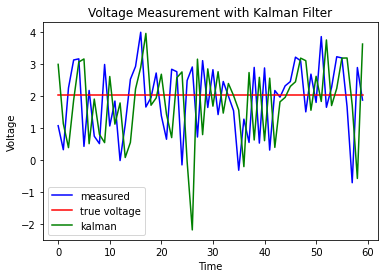

In [ ]:
import random
import numpy
import pylab

class KalmanFilterLinear:
  def __init__(self,_A,_B,_H,_x,_P,_Q,_R):
    self.A = _A
    self.B = _B
    self.H = _H
    self.current_state_estimate = _x
    self.current_prob_estimate = _P
    self.Q = _Q
    self.R = _R
  def GetCurrentstate(self):
    return self.current_state_estimate
  def Step(self, control_vector, measurement_vector):
    predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector#mean
    predicted_prob_estimate = (self.A * self.current_state_estimate) * numpy.transpose(self.A) + self.Q#covani

    innovation = measurement_vector - self.H * predicted_state_estimate
    innovation_covariance = self. H * predicted_prob_estimate * numpy.transpose (self.H) + self.R

    kalman_gain = predicted_prob_estimate * numpy. transpose (self.H) * numpy. linalg. inv(innovation_covariance)
    self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation

    size = self.current_prob_estimate.shape [0]

    self.current_prob_estimate = (numpy. eye (size) - kalman_gain*self.H) * predicted_prob_estimate

class Voltmeter:
  def __init__(self,_truevoltage,_noiselevel):
    self. truevoltage=_truevoltage
    self.noiselevel=_noiselevel

  def GetVoltage(self):
    return self.truevoltage

  def GetVoltageWithNoise(self):
    return random.gauss(self.GetVoltage(), self.noiselevel)


numsteps=60

A = numpy.matrix([1])
H = numpy.matrix([1])
B = numpy.matrix([0])
Q = numpy.matrix([0.00001])
R = numpy.matrix([0.1])
xhat = numpy.matrix([3])
P = numpy.matrix([1])

filter = KalmanFilterLinear(A,B,H,xhat,P,Q,R)
voltmeter = Voltmeter(2.05,1.25)

measuredvoltage = []
truevoltage = []
kalman = []


for i in range (numsteps):
     measured = voltmeter.GetVoltageWithNoise()
     measuredvoltage.append(measured)
     truevoltage.append(voltmeter.GetVoltage())
     kalman.append(filter.GetCurrentstate() [0,0])
     filter.Step(numpy.matrix([0]),numpy.matrix([measured]))

pylab.plot(range(numsteps),measuredvoltage,'b',range(numsteps),truevoltage,'r', range(numsteps),kalman,'g')
pylab.xlabel('Time')
pylab.ylabel ('Voltage')
pylab.title ('Voltage Measurement with Kalman Filter')
pylab.legend (('measured','true voltage','kalman'))
pylab. show ()
